0 [D loss: -0.006658319383859634] [G loss: -0.006872230675071478]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


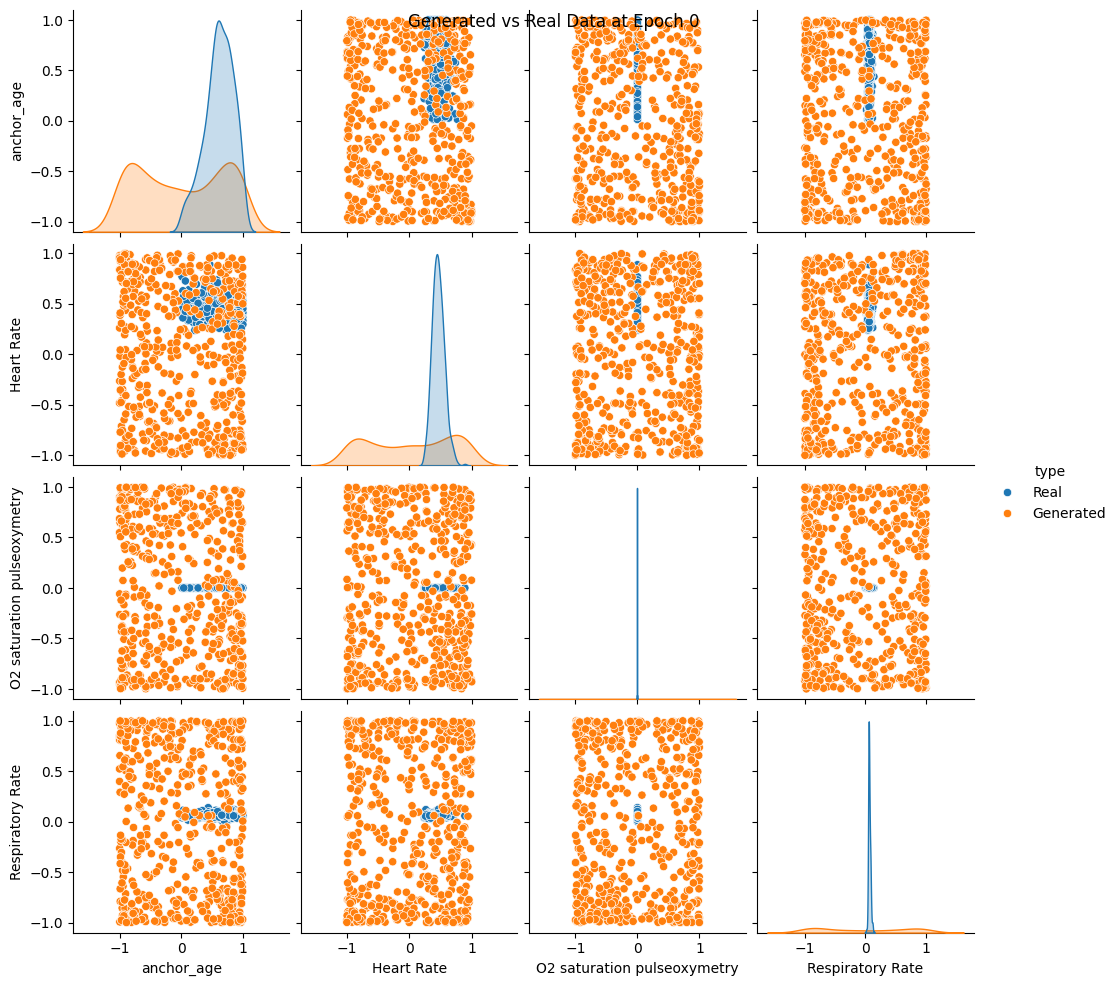

1000 [D loss: 0.006424739956855774] [G loss: -0.039940349757671356]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


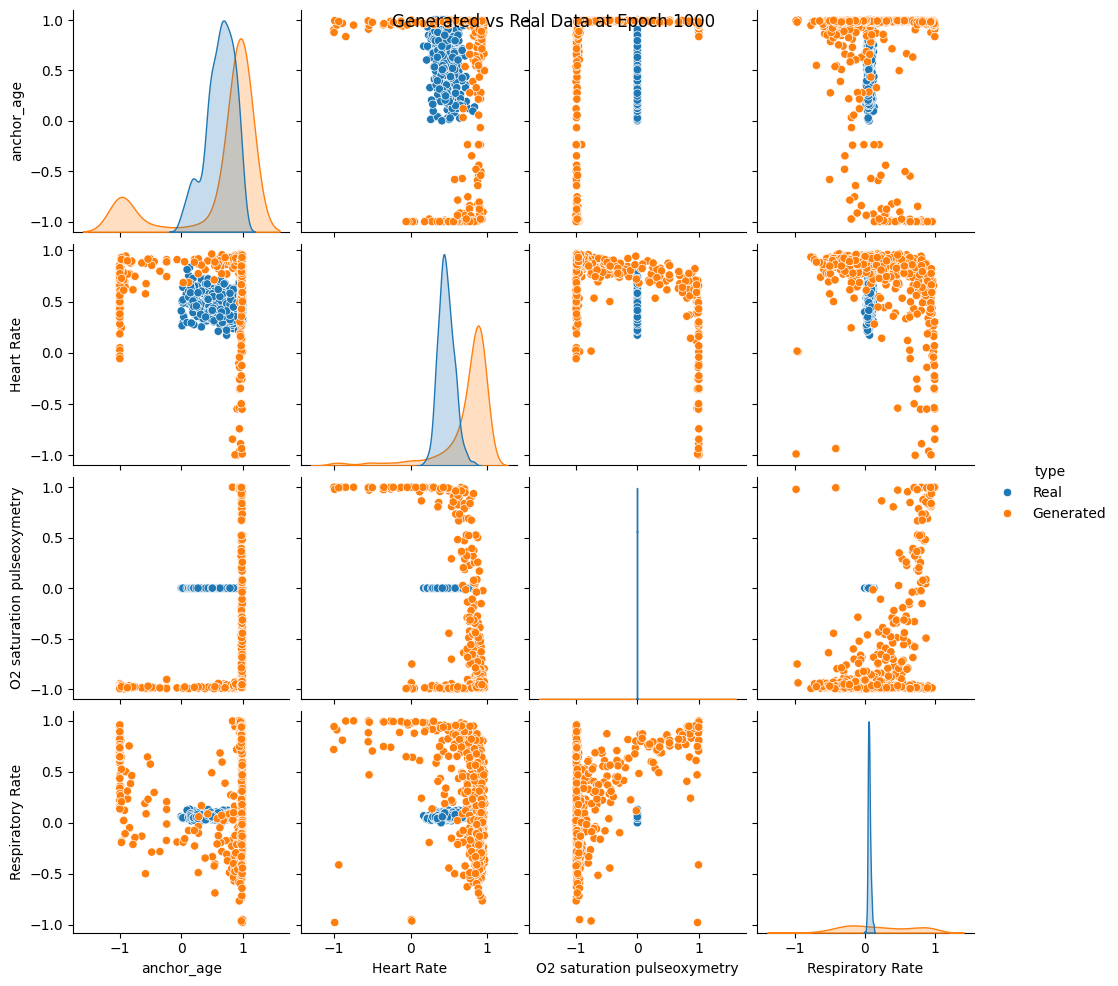

2000 [D loss: 0.0034340452402830124] [G loss: -0.026142187416553497]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


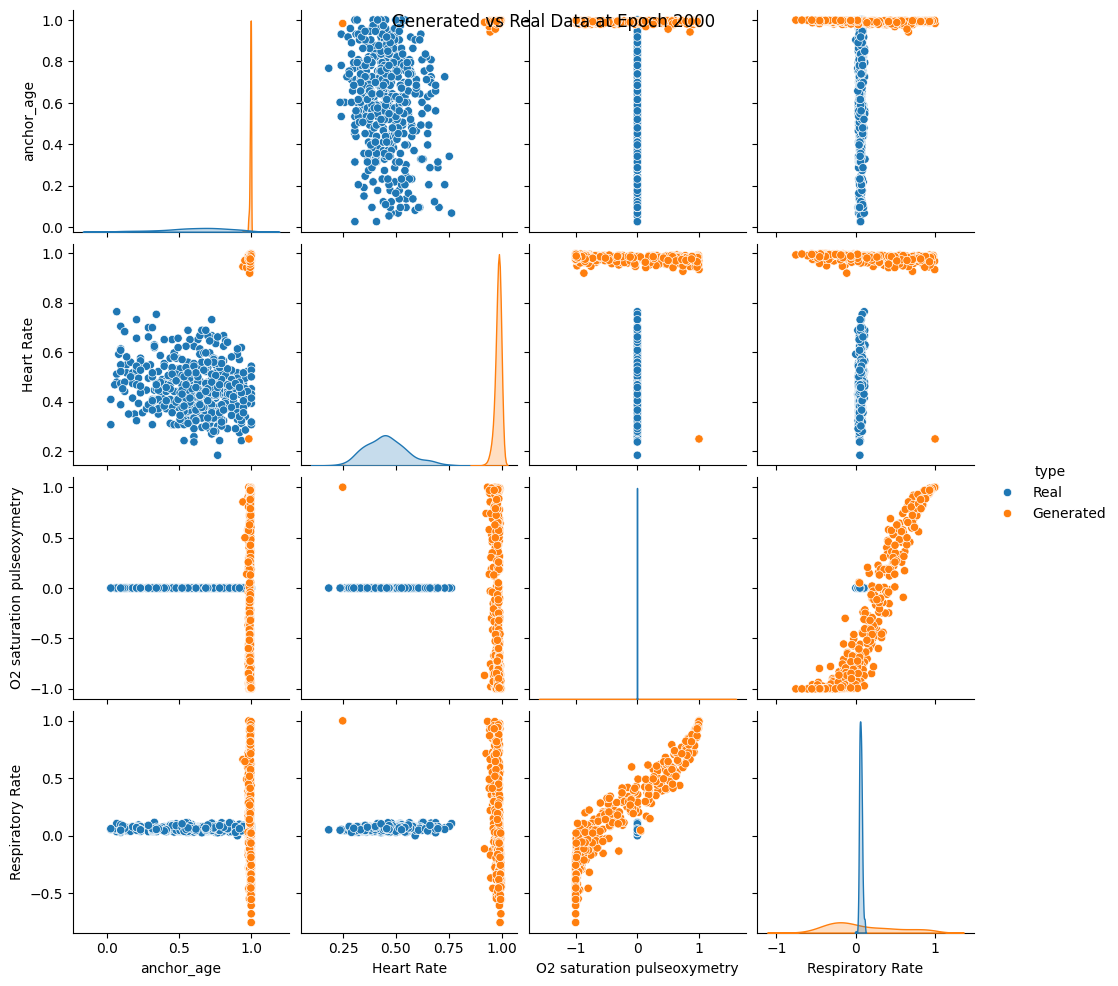

3000 [D loss: 0.0030562086030840874] [G loss: -0.01687493547797203]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


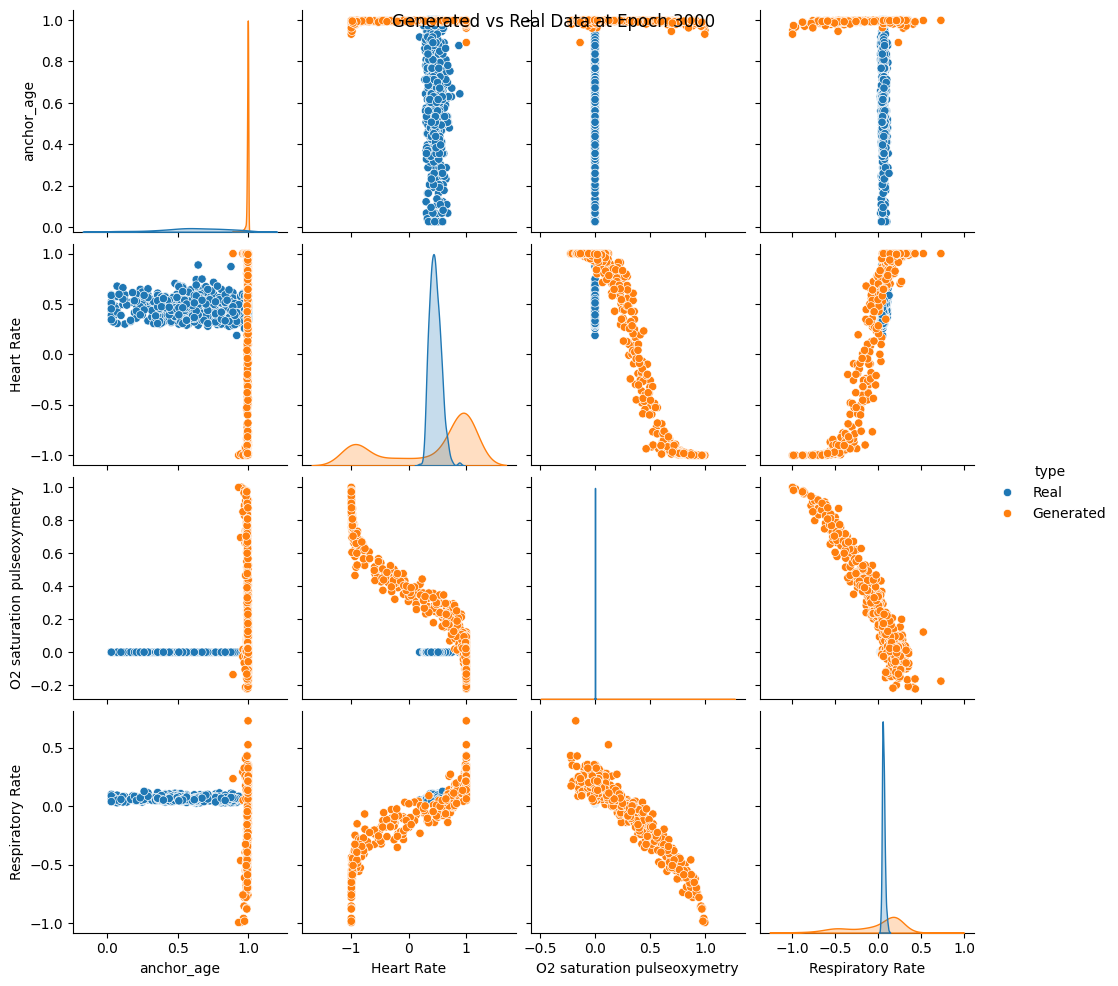

4000 [D loss: 0.0012635774910449982] [G loss: -0.009711467660963535]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


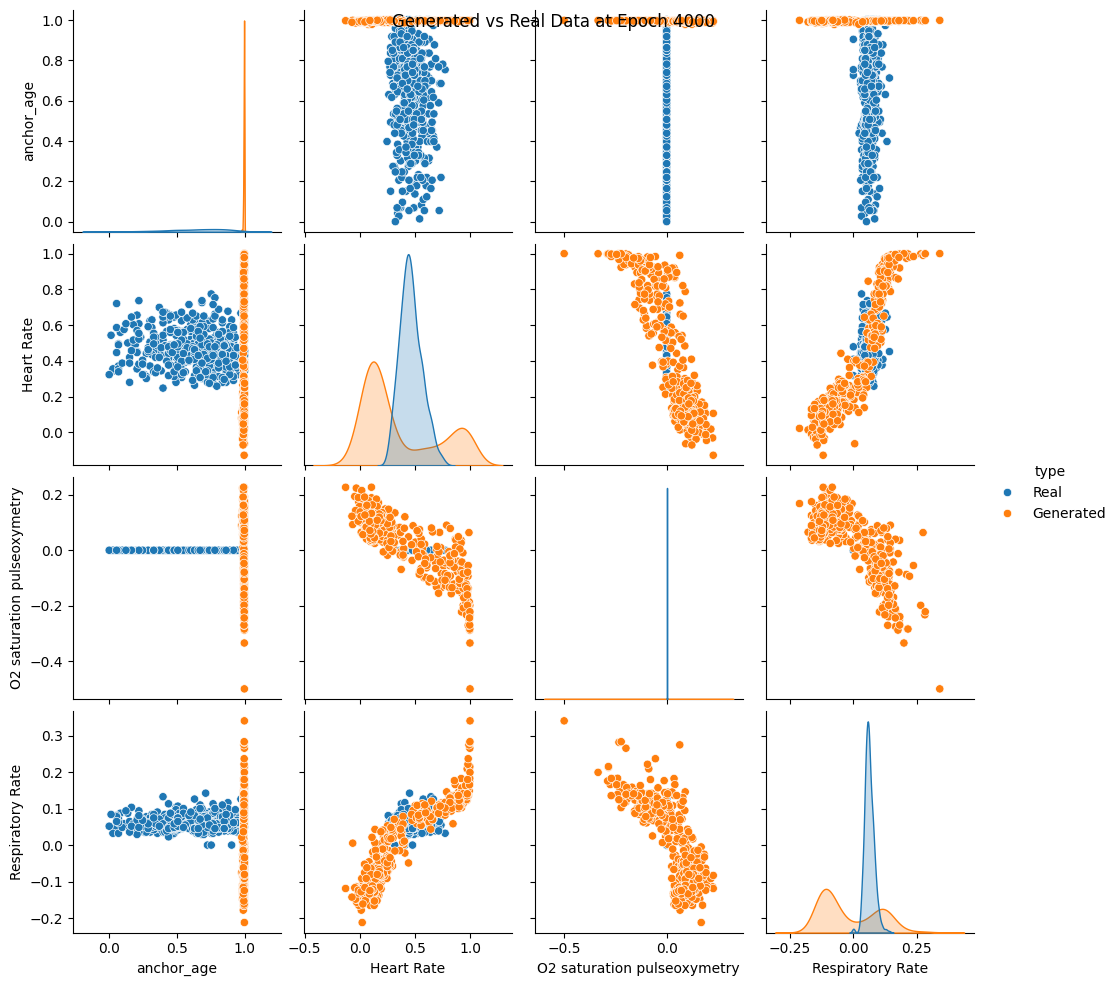

5000 [D loss: -0.0007149300654418766] [G loss: -0.00048316651373170316]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


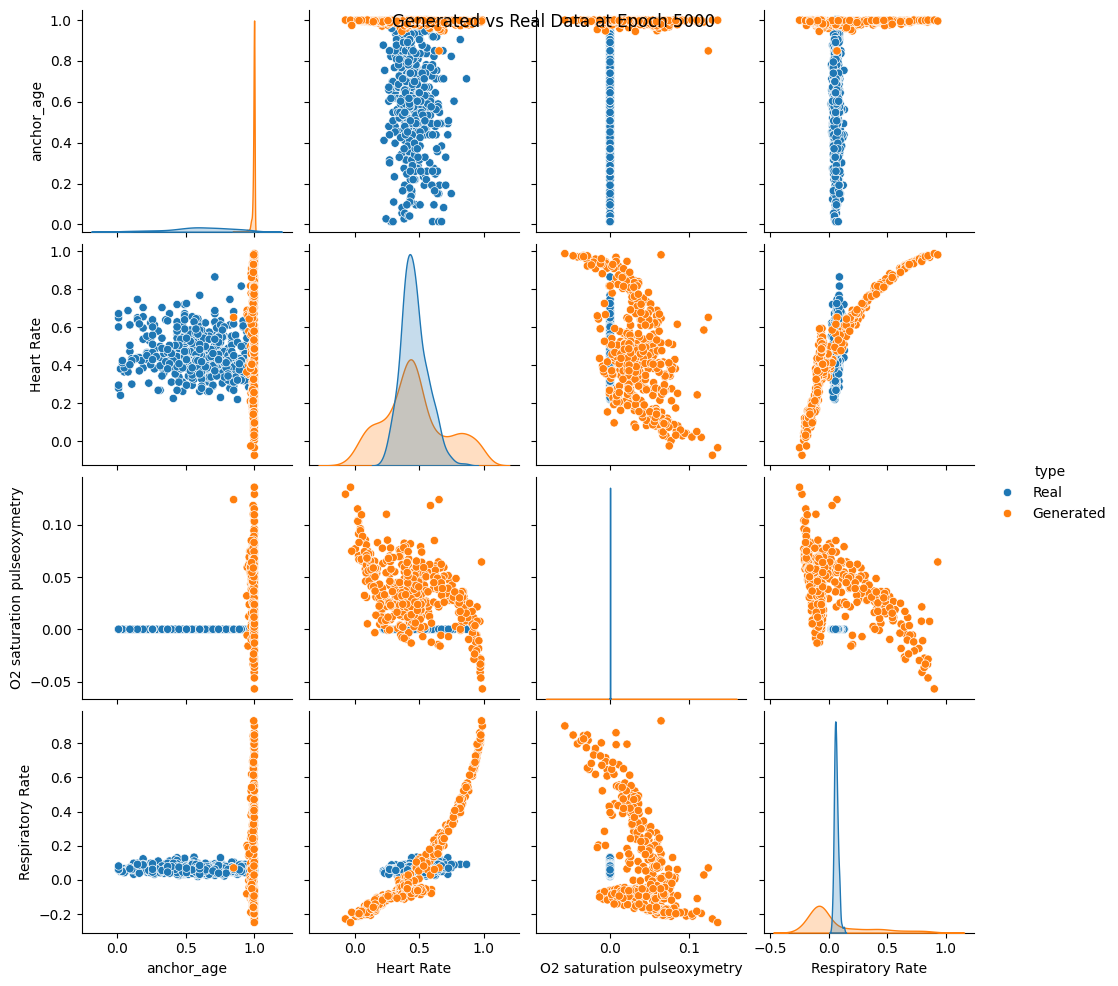

6000 [D loss: 0.0029396540485322475] [G loss: -0.013499065302312374]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


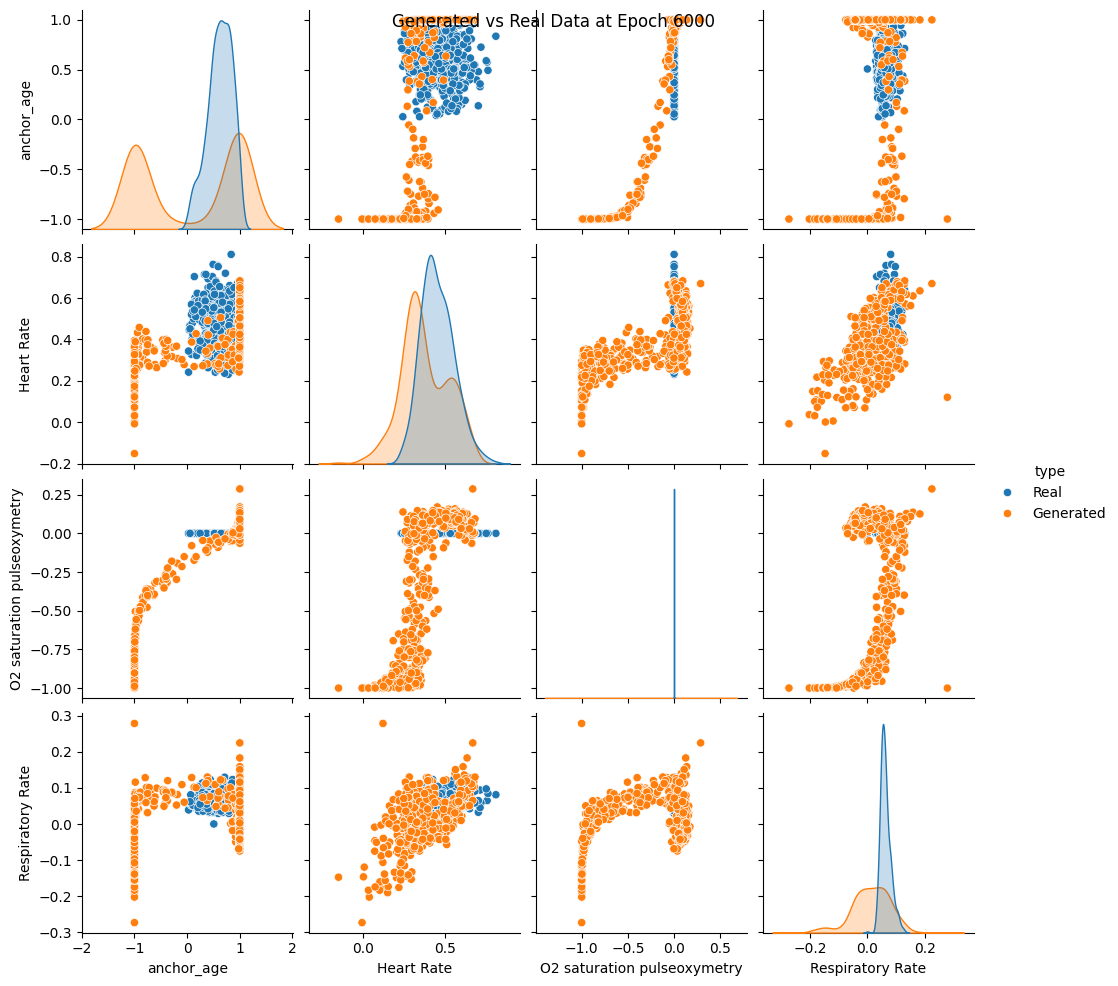

7000 [D loss: -0.002176364418119192] [G loss: -0.012063458561897278]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


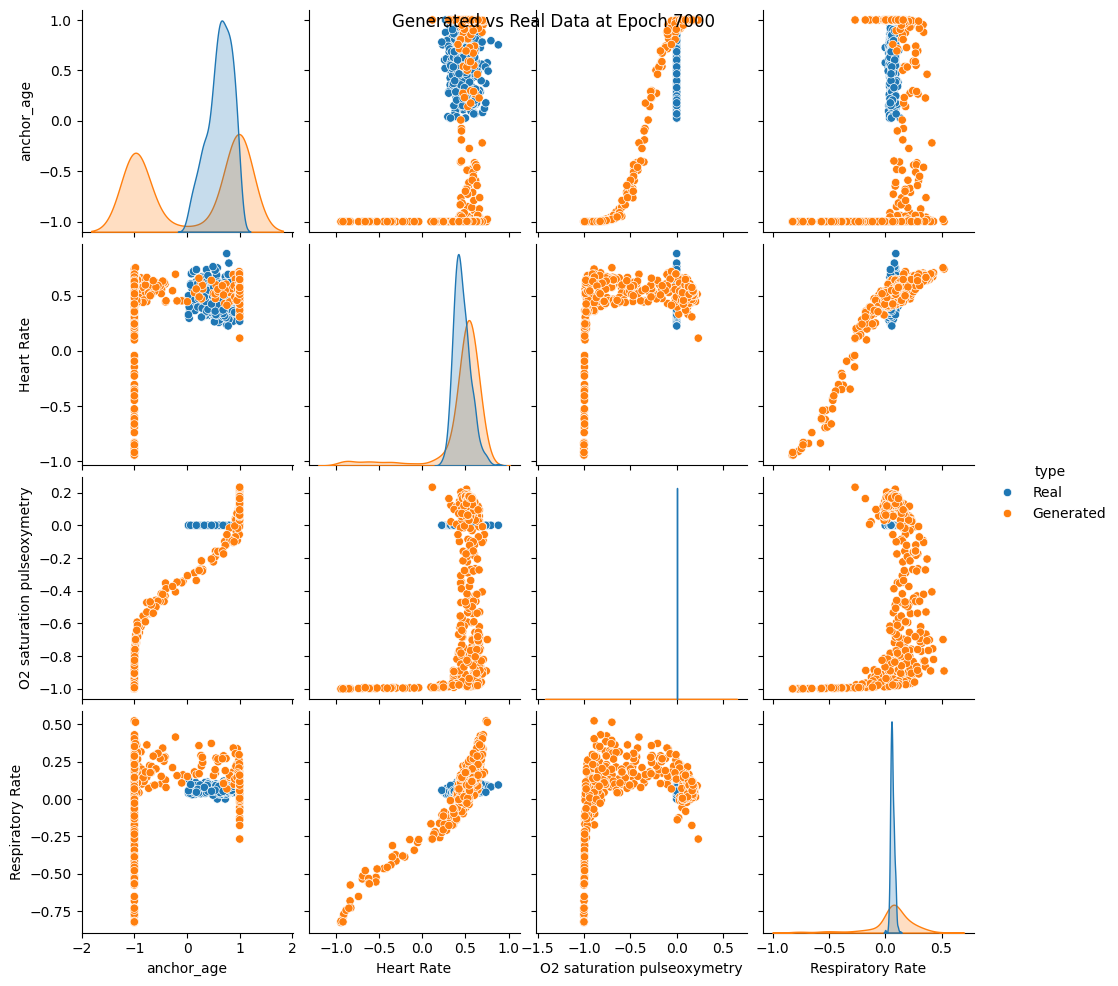

8000 [D loss: 0.0008393293246626854] [G loss: -0.021176882088184357]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


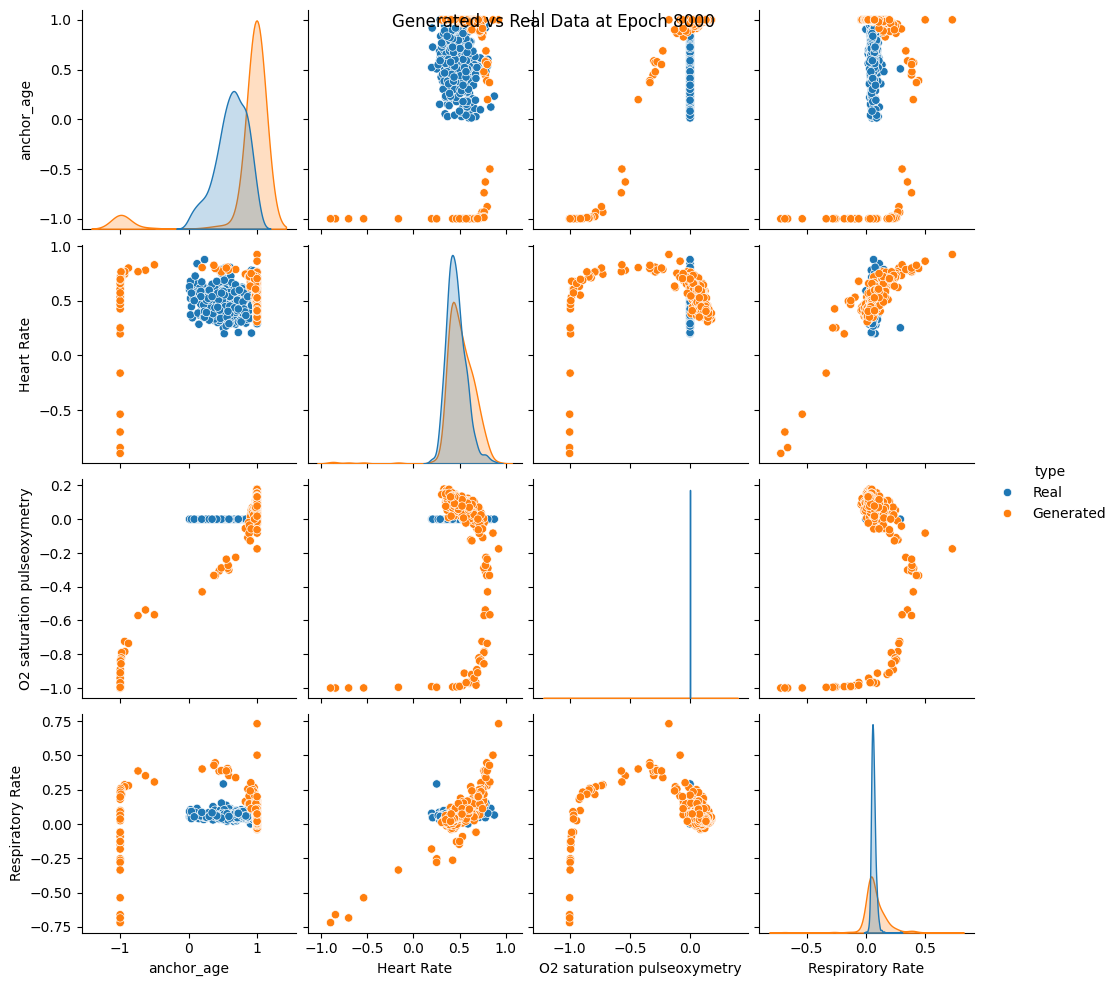

9000 [D loss: 1.458125188946724e-05] [G loss: -0.012419544160366058]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


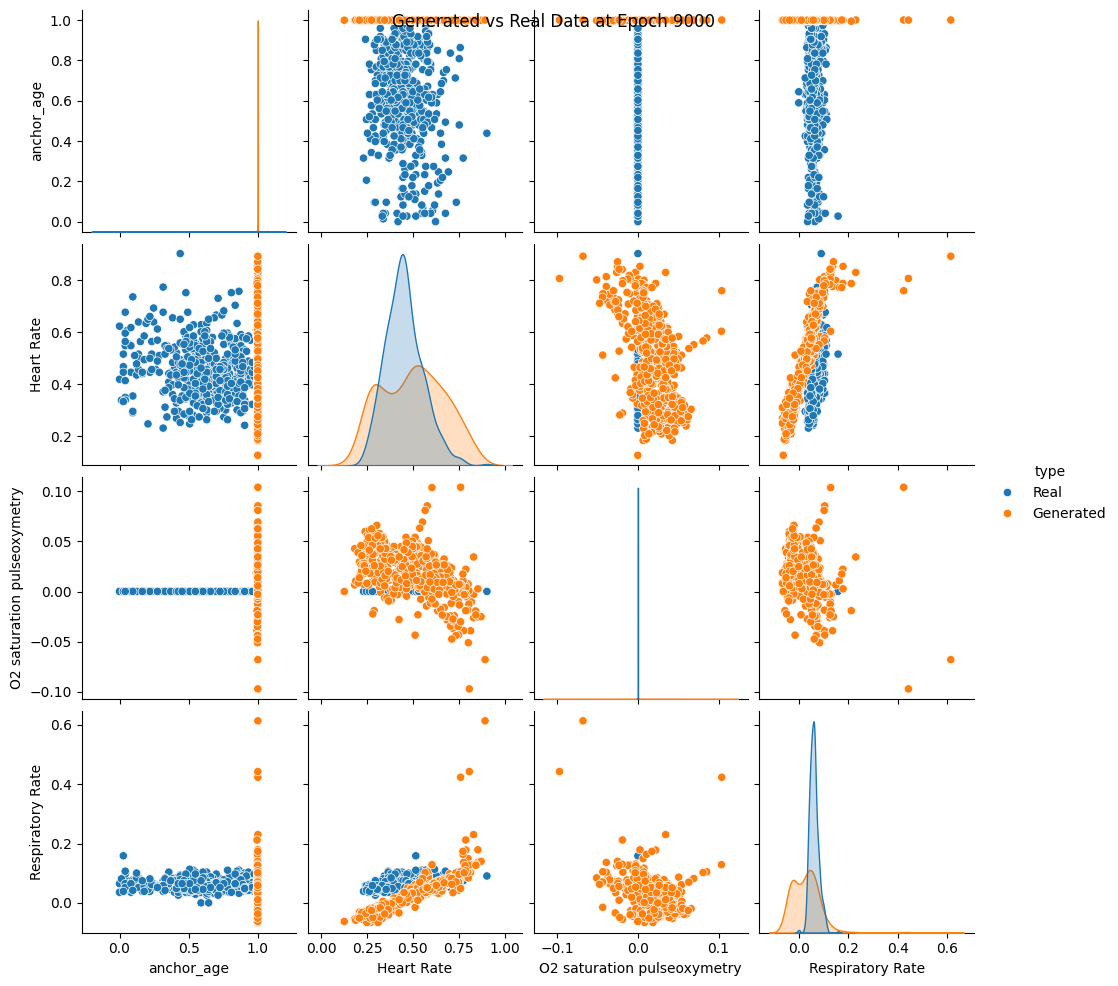

10000 [D loss: 0.0007271291688084602] [G loss: -0.010090060532093048]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


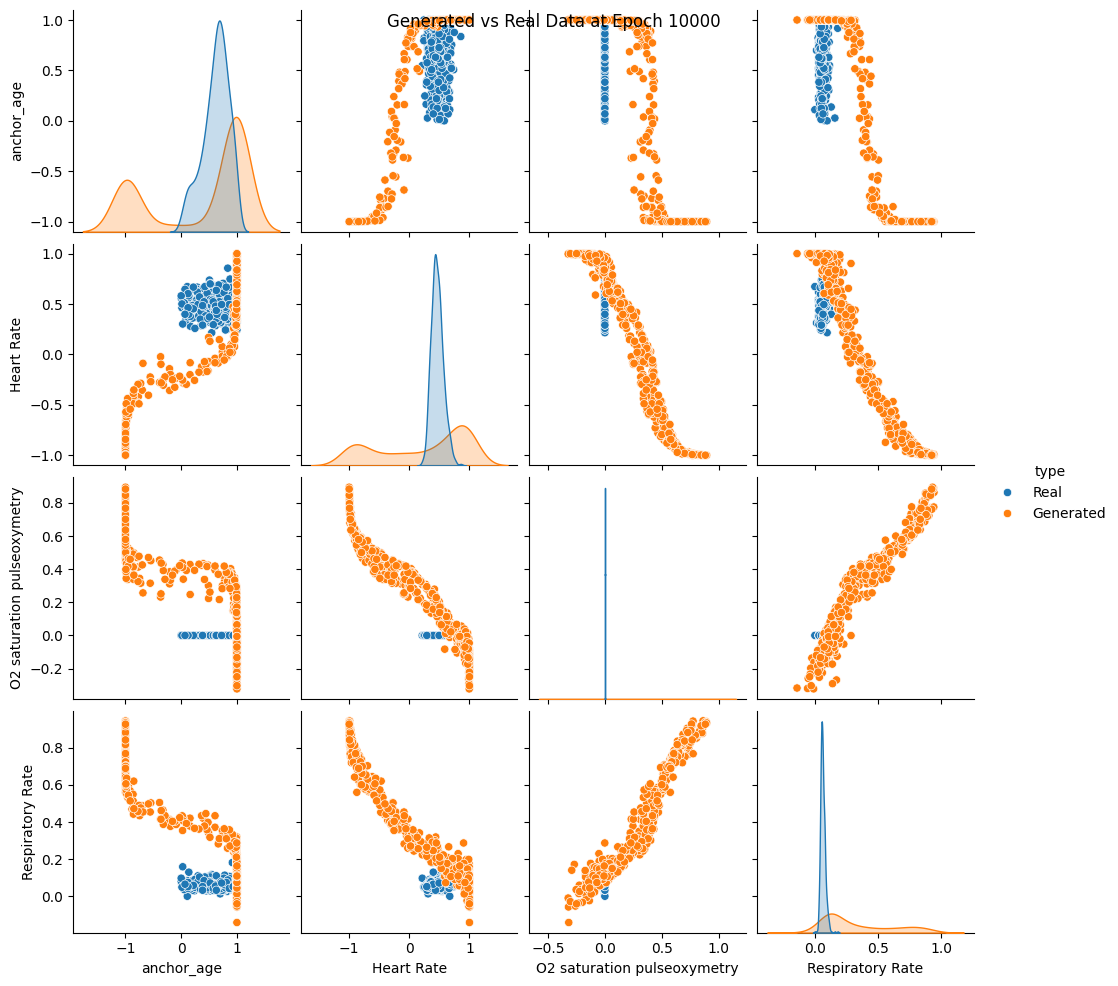

11000 [D loss: -0.0026274854317307472] [G loss: -0.011212438344955444]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


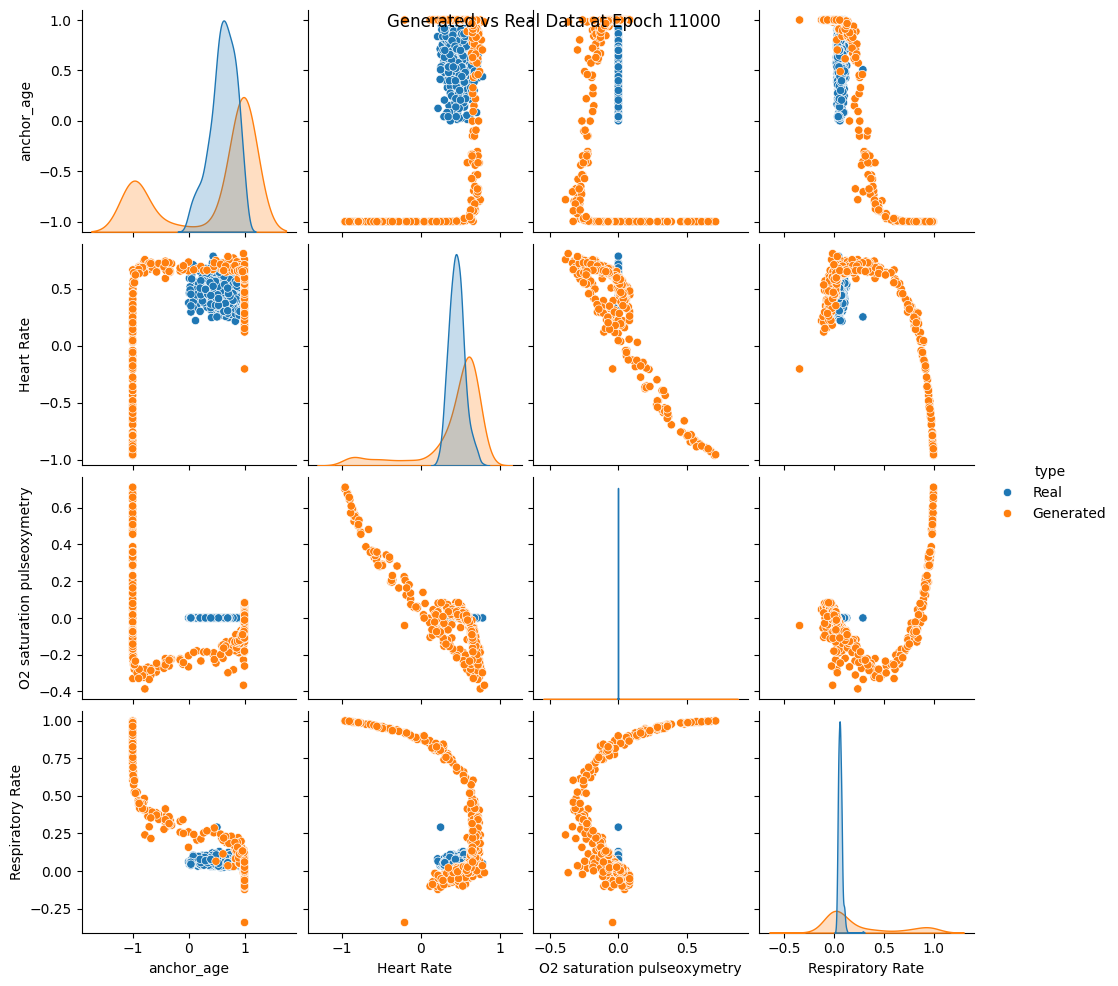

12000 [D loss: -0.0010343161411583424] [G loss: -0.00913405604660511]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


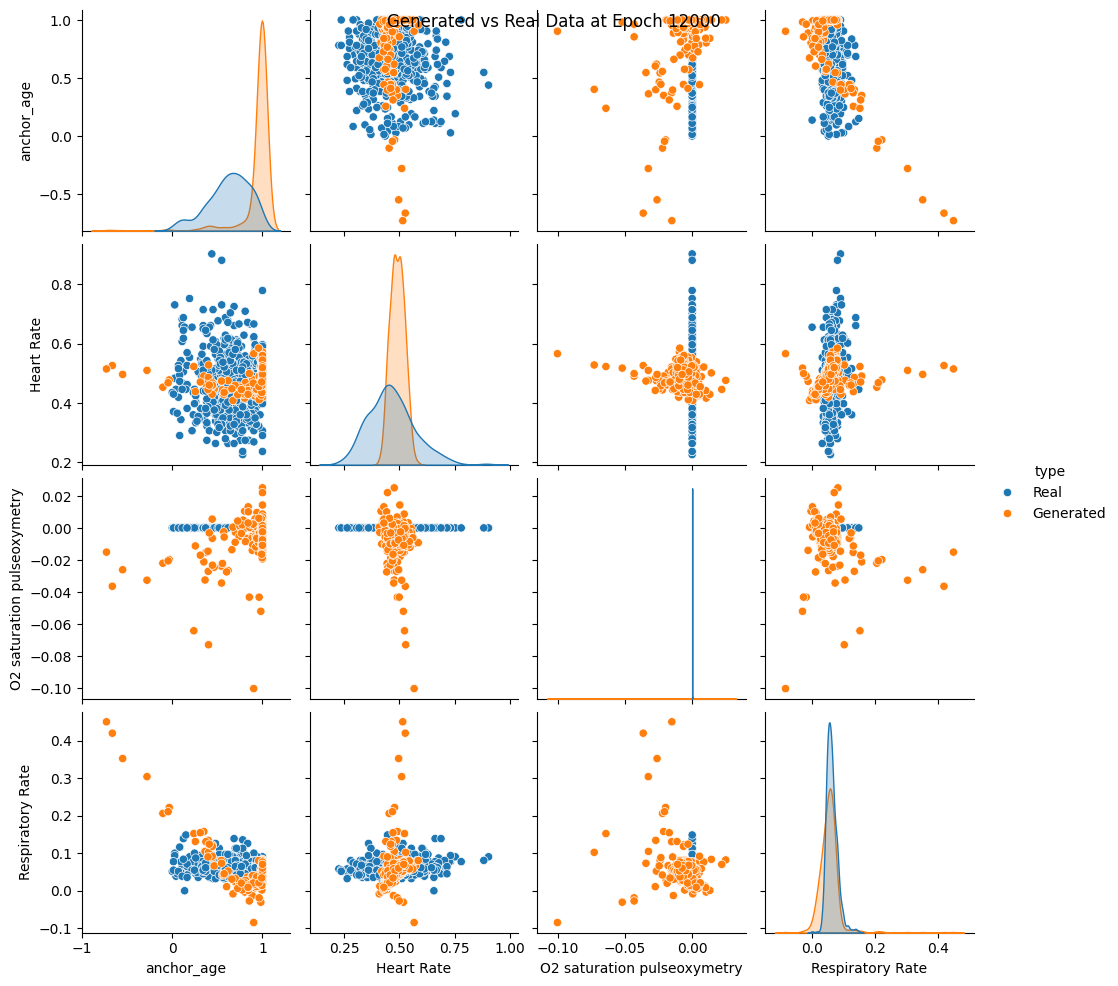

13000 [D loss: -0.0006536156870424747] [G loss: -0.006704743020236492]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


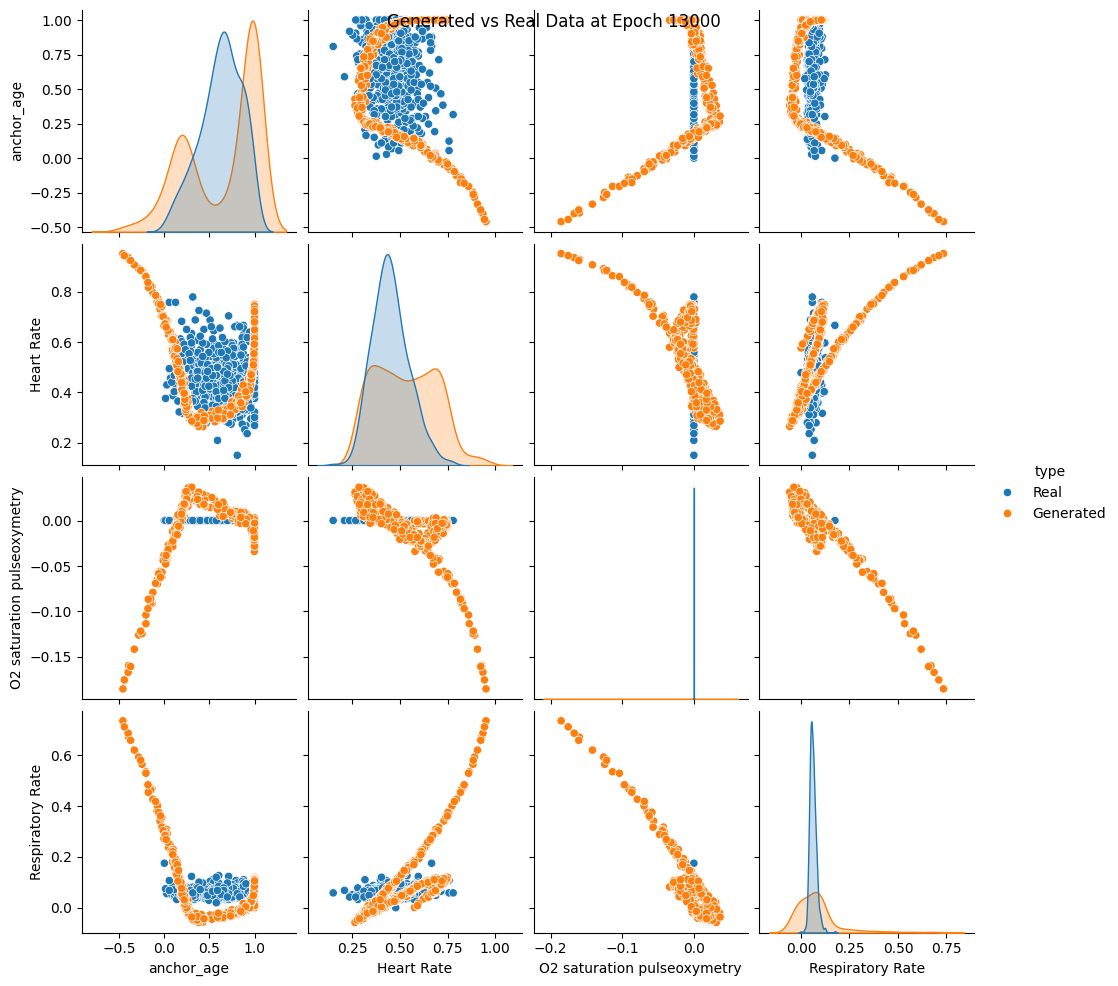

14000 [D loss: 0.0003260555677115917] [G loss: -0.010235759429633617]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


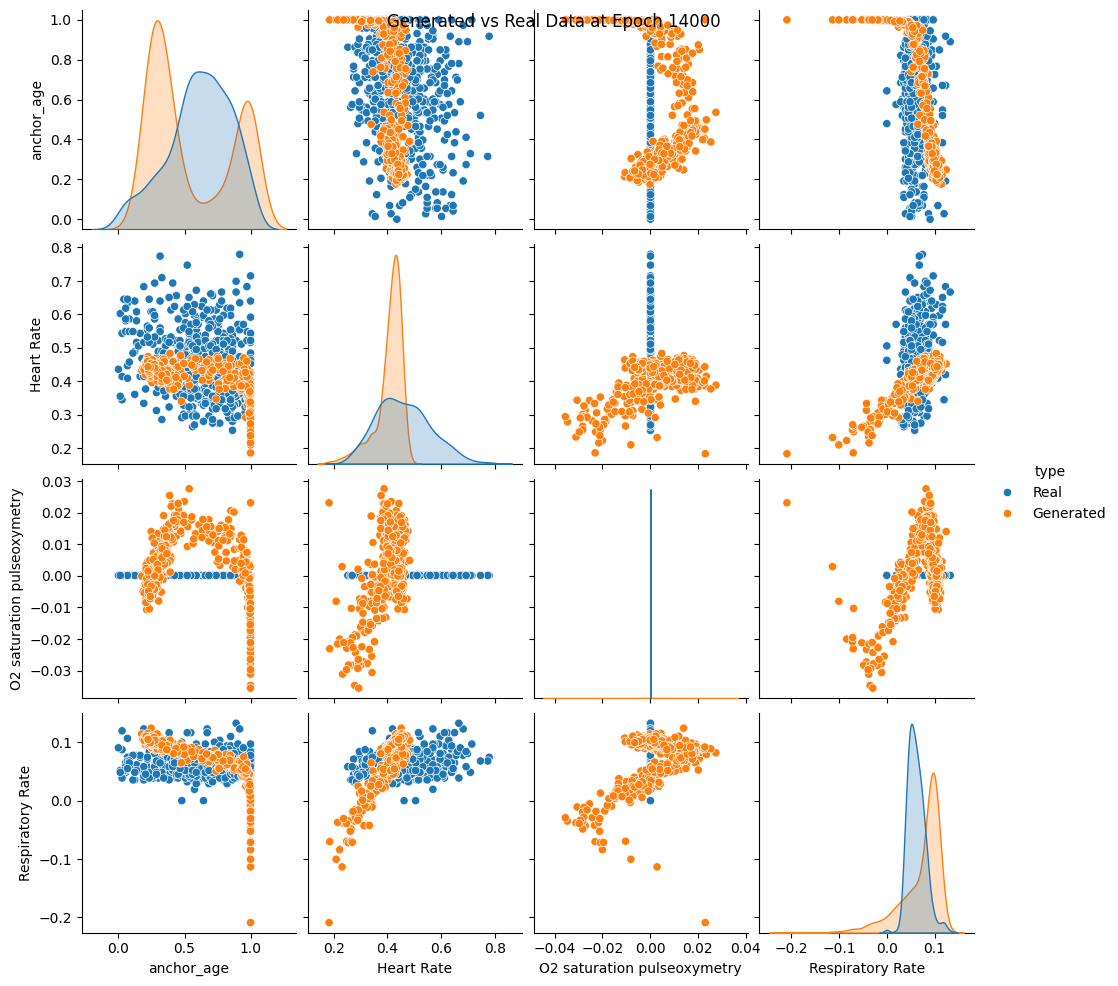

15000 [D loss: 0.00027682026848196983] [G loss: -0.011109502986073494]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


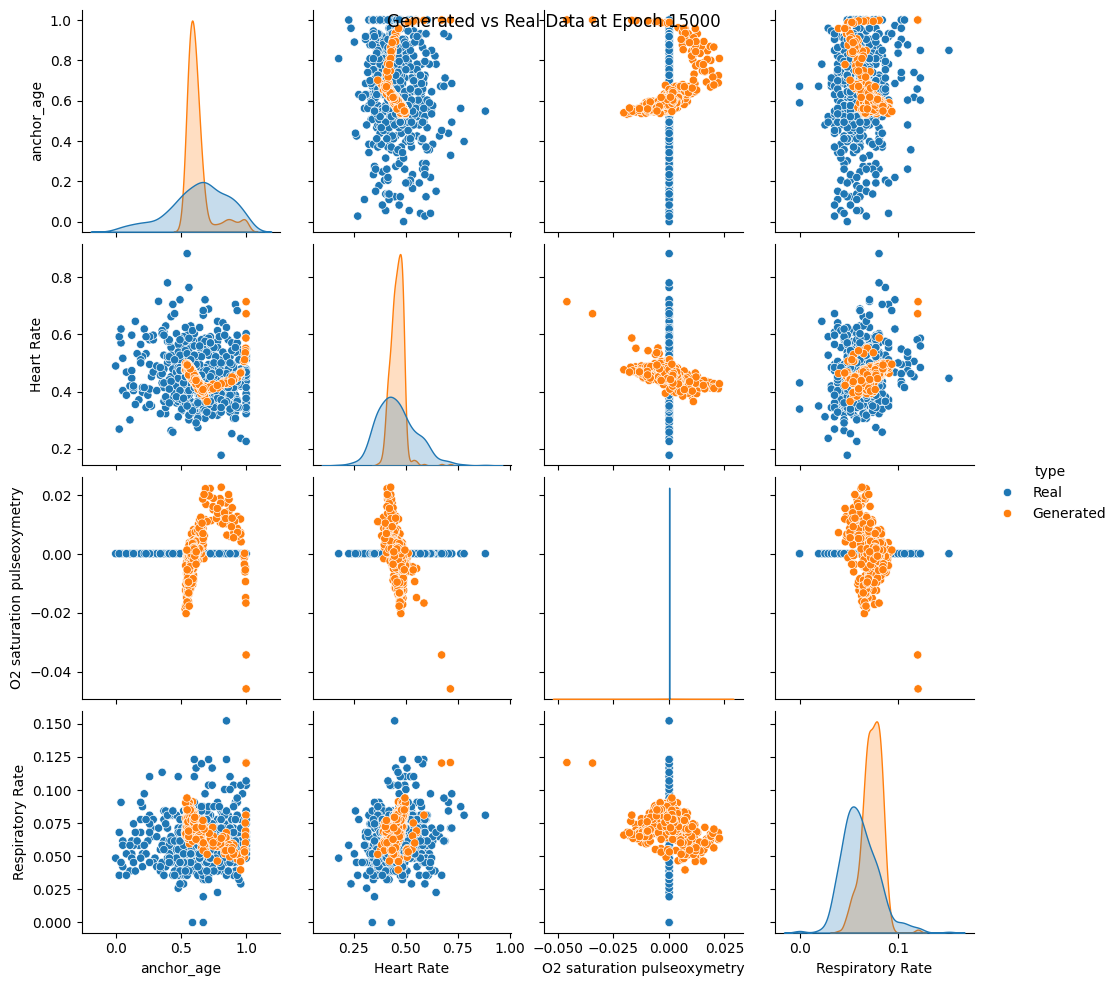

16000 [D loss: 8.3189457654953e-05] [G loss: -0.009772922843694687]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


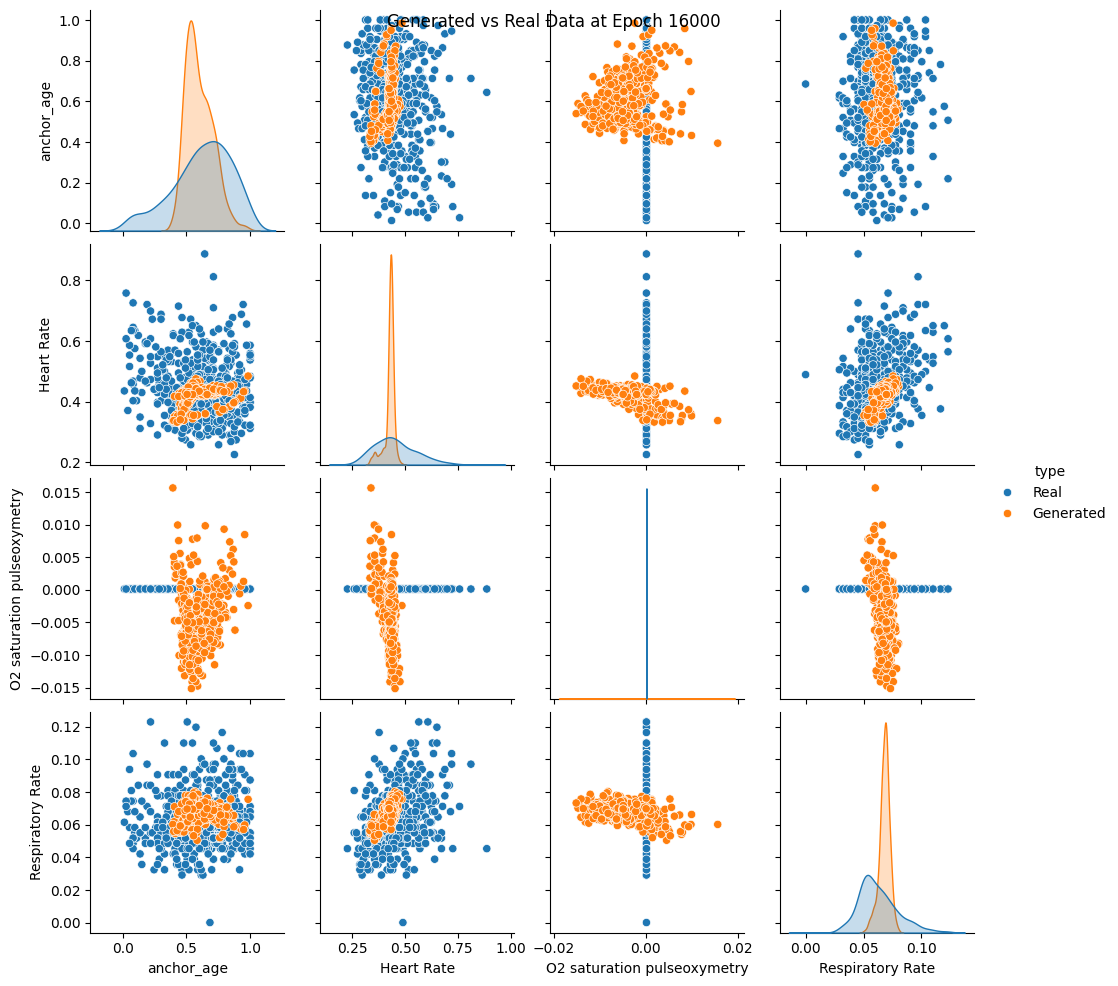

17000 [D loss: 5.9989746659994125e-05] [G loss: -0.00918041355907917]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


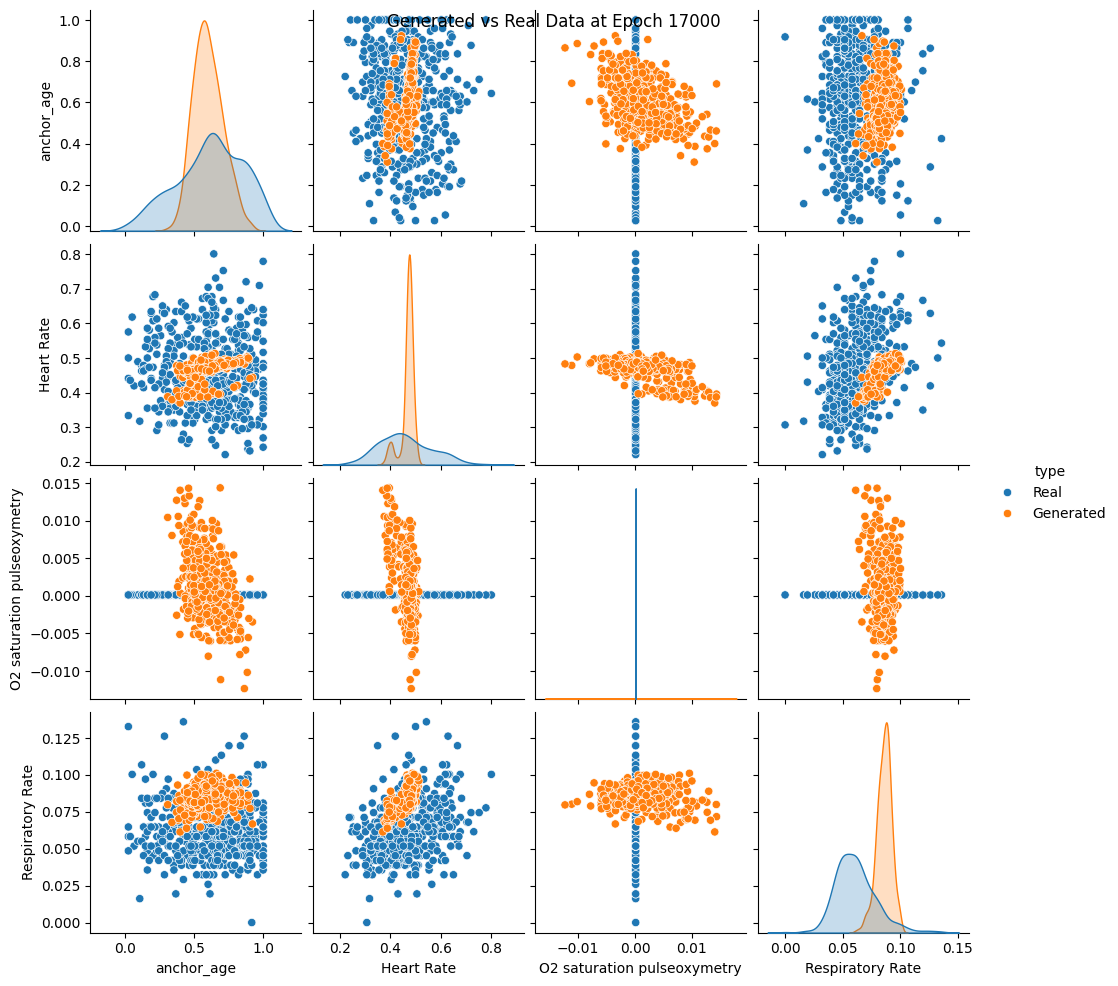

18000 [D loss: 3.3573247492313385e-05] [G loss: -0.008850032463669777]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


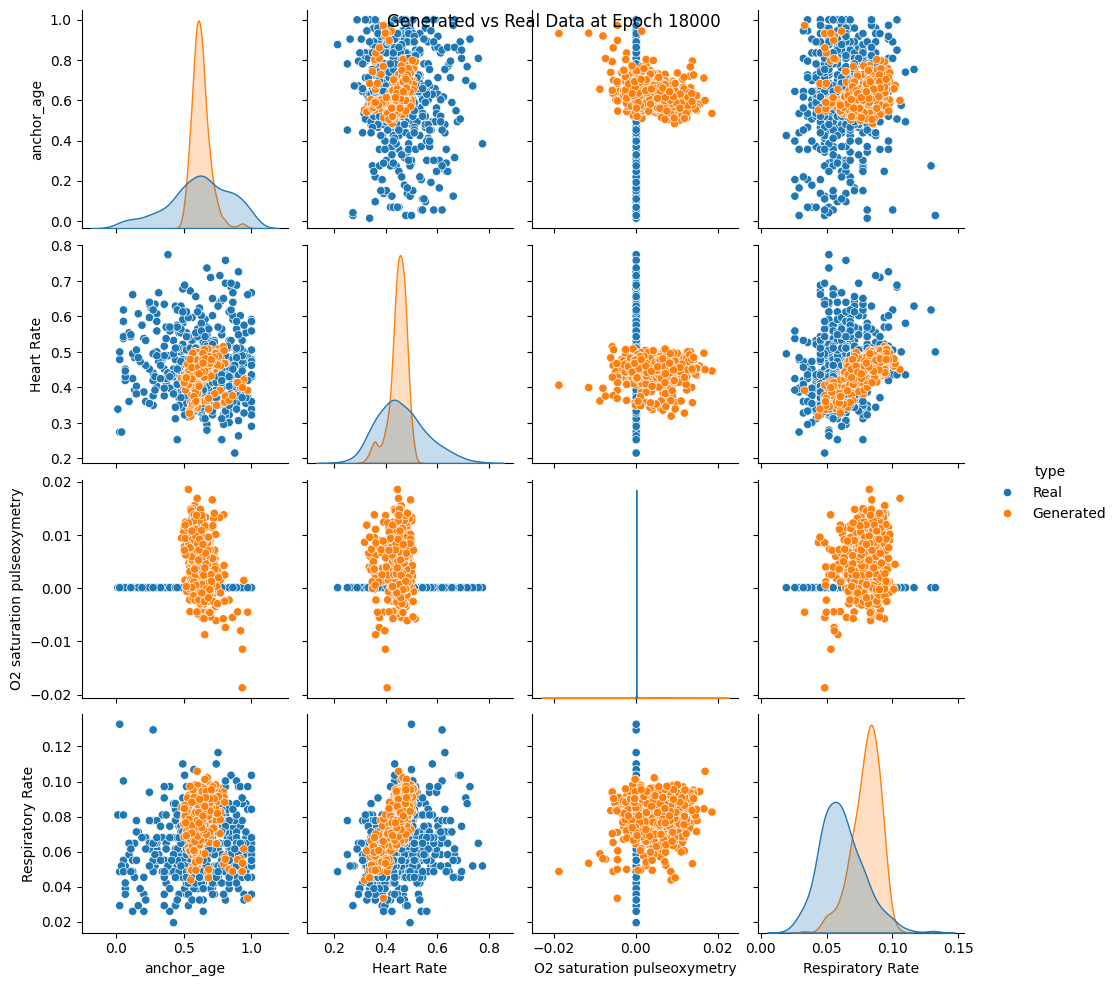

19000 [D loss: 2.554710954427719e-05] [G loss: -0.008597955107688904]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


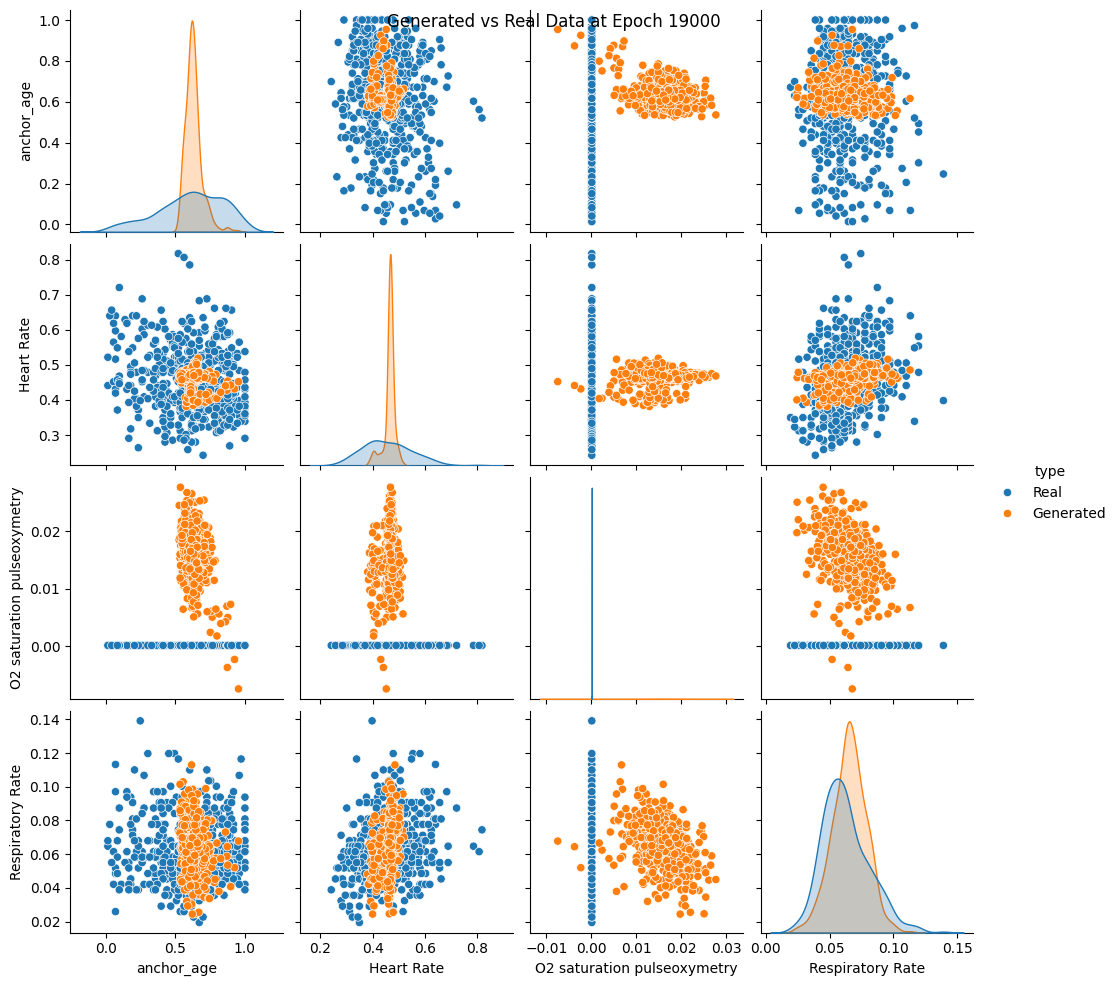

20000 [D loss: 1.8777791410684586e-05] [G loss: -0.008367032743990421]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


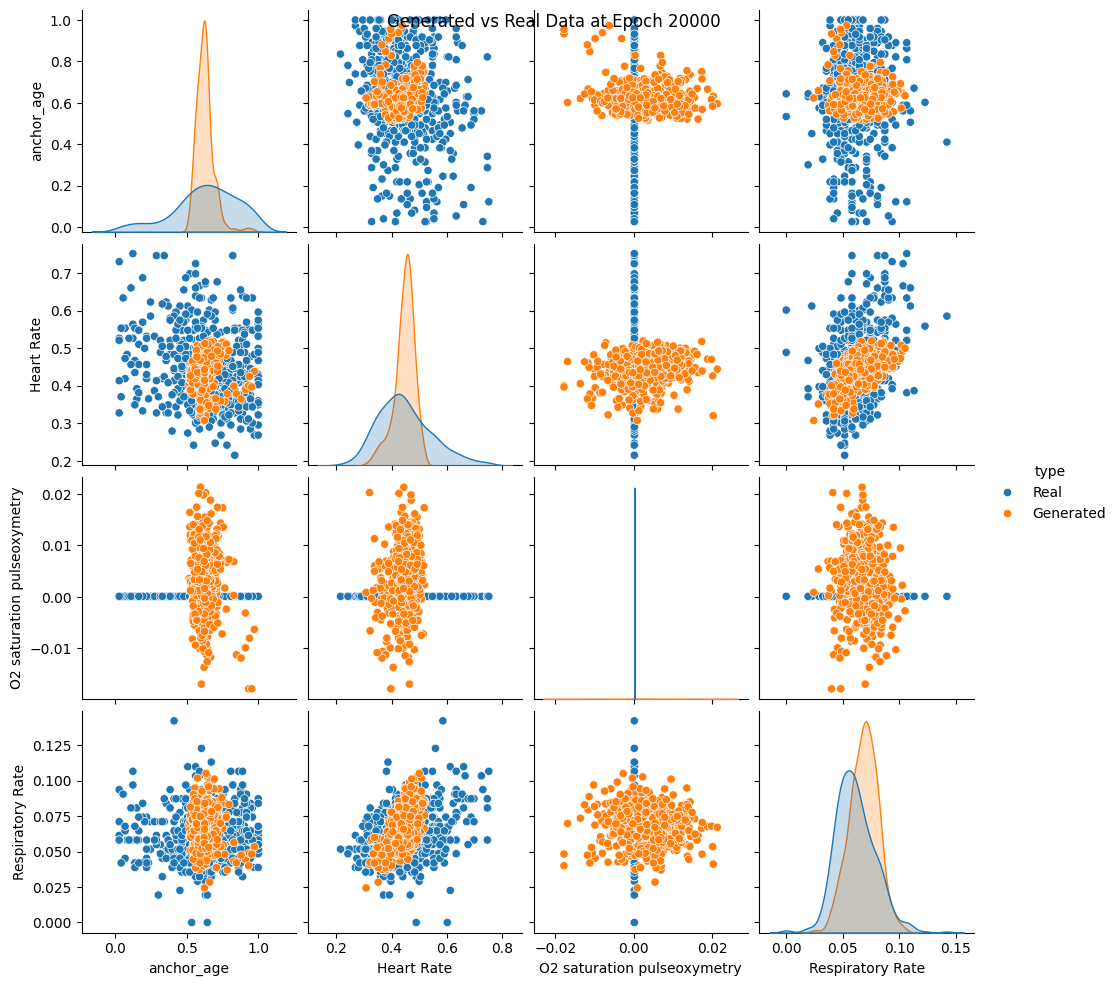

In [1]:
# Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, SGD

import warnings
warnings.filterwarnings('ignore')

# Load the data i.e., load only the specified columns and use 10,000 observations
data = pd.read_csv('final.csv', usecols=['anchor_age', 'Heart Rate', 'O2 saturation pulseoxymetry', 'Respiratory Rate'])

# Convert to numpy array for TensorFlow compatibility
data = data.values 

# Remove rows with NaN values
data = data[~np.isnan(data).any(axis=1)]

# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Define batch size - number of training samples used in a single iteration
batch_size = 512

# Function to randomly select a batch of samples from the dataset for training
def sample_data(n=batch_size):
    """
    Inputs:
    n: The number of samples to be drawn in a single batch. It defaults to batch_size.

    Uses np.random.randint to generate n random integers between 0 and the total number of 
    samples in the dataset (data.shape[0])

    Purpose: Provide a random batch of samples from the dataset during each training iteration. 
    This randomness helps in training the model more effectively by exposing it to different parts of the dataset in each iteration, 
    promoting better generalization and reducing overfitting.
    """
    indices = np.random.randint(0, data.shape[0], n)
    return data[indices]

# Generator Network
def generator(Z, output_dim=4, hsize=[32]):
    """
    Inputs:
    Z: Input tensor (latent space).
    output_dim: Dimension of the output layer.
    hsize: List containing the size of hidden layers.

    Builds the generator network which takes the latent space vector Z as input and generates synthetic data.
    """
    model = tf.keras.Sequential()
    # Input layer with random normal initializer
    model.add(Dense(hsize[0], input_dim=Z.shape[1], kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.02)))
    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.2))
    # Batch normalization for stabilizing training
    model.add(BatchNormalization(momentum=0.8))
    # Output layer with tanh activation
    model.add(Dense(output_dim, activation='tanh'))
    return model

# Critic Network
def critic(X, hsize=[32], output_dim=1, activation='linear'):
    """
    Inputs:
    X: Input tensor (real or generated data).
    hsize: List containing the size of hidden layers.
    output_dim: Dimension of the output layer.
    activation: Activation function for the output layer.

    Builds the critic network which evaluates the authenticity of the input data (real or generated).
    """
    model = tf.keras.Sequential()
    # Input layer with random normal initializer
    model.add(Dense(hsize[0], input_dim=X.shape[1], kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.02)))
    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.2))
    # Output layer with specified activation
    model.add(Dense(output_dim, activation=activation))
    return model

# Wasserstein Loss Function
def wasserstein_loss(y_true, y_pred):
    """
    Inputs:
    y_true: True labels.
    y_pred: Predicted labels.

    Computes the Wasserstein loss for training the WGAN model.
    """
    return tf.keras.backend.mean(y_true * y_pred)

# Custom training step with gradient clipping
@tf.function
def train_step(real_data):
    """
    Inputs:
    real_data: Batch of real data from the dataset.

    Performs one training step, including:
    - Generating fake data
    - Calculating and applying gradients for the critic
    - Calculating and applying gradients for the generator
    - Clipping the gradients for the critic to stabilize training
    """

    # Generate random latent space samples (noise) for input to the generator
    z = tf.random.normal((batch_size, latent_dim))
    
    # Gradient tape for recording operations for automatic differentiation (for critic)
    with tf.GradientTape() as tape:
        fake_data = generator_model(z, training=True) # Generate fake data using the generator

        # Obtain critic's output for real and fake data
        real_output = critic_model(real_data, training=True)
        fake_output = critic_model(fake_data, training=True)

        # Calculate Wasserstein loss for real data and fake data
        d_loss_real = wasserstein_loss(-tf.ones_like(real_output), real_output)
        d_loss_fake = wasserstein_loss(tf.ones_like(fake_output), fake_output)
        d_loss = 0.5 * (d_loss_real + d_loss_fake)

    # Clip the gradients to stabilize training   
    gradients = tape.gradient(d_loss, critic_model.trainable_variables)
    clipped_gradients = [tf.clip_by_value(grad, -clip_value, clip_value) for grad in gradients]
    critic_optimizer.apply_gradients(zip(clipped_gradients, critic_model.trainable_variables))

    # Same process as above for the generator.
    with tf.GradientTape() as tape:
        generated_data = generator_model(z, training=True)
        validity = critic_model(generated_data, training=True)
        g_loss = wasserstein_loss(-tf.ones_like(validity), validity)
    
    gradients = tape.gradient(g_loss, generator_model.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients, generator_model.trainable_variables))
    
    return d_loss, g_loss

# Function to visualize samples
def visualize_samples(real_data, generated_data, epoch):
    """
    Inputs:
    real_data: Batch of real data from the dataset.
    generated_data: Batch of data generated by the generator model.
    epoch: Current epoch number.

    Visualizes the real and generated data using pair plots for comparison.
    """
    # Combine real and generated data for comparison
    real_df = pd.DataFrame(real_data, columns=['anchor_age', 'Heart Rate', 'O2 saturation pulseoxymetry', 'Respiratory Rate'])
    real_df['type'] = 'Real'
    
    generated_df = pd.DataFrame(generated_data, columns=['anchor_age', 'Heart Rate', 'O2 saturation pulseoxymetry', 'Respiratory Rate'])
    generated_df['type'] = 'Generated'
    
    combined_df = pd.concat([real_df, generated_df])
    
    # Create a pairplot for visual comparison
    sns.pairplot(combined_df, hue='type')
    plt.suptitle(f'Generated vs Real Data at Epoch {epoch}')
    plt.show()

# Training parameters
epochs = 20001
latent_dim = 100
n_critic = 15  # Number of critic iterations per generator iteration
clip_value = 0.01  # Clip weights of the critic

# Build and compile the critic
critic_model = critic(data)
critic_optimizer = SGD(learning_rate=0.000015)

# Build the generator
generator_model = generator(np.random.normal(0, 1, (batch_size, latent_dim)))
generator_optimizer = RMSprop(learning_rate=0.000012)

# Training loop
for epoch in range(epochs):
    for _ in range(n_critic):
        real_data = sample_data(batch_size)
        d_loss, g_loss = train_step(real_data)
    
    # Print the progress every 1000 epochs
    if epoch % 1000 == 0:
        print(f"{epoch} [D loss: {d_loss.numpy()}] [G loss: {g_loss.numpy()}]")
        
        # Generate and visualize samples
        z = np.random.normal(0, 1, (batch_size, latent_dim))
        generated_samples = generator_model.predict(z)
        visualize_samples(real_data, generated_samples, epoch)
